In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.compat.v2.feature_column as fc
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import io
from tensorflow import keras
import seaborn as sns
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
import pickle as pk
from sklearn.decomposition import PCA as pca


import os
from os import path

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8bjaew5f because the default path (/home/juliuswa/installed/apache-tomcat-9.0.30/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df_name = "95"
layer1nodes = 256
prefix = "losh"

data_path = "../../RoboDocData"

df_path = f"{data_path}/{df_name}"

model_name = f"df{df_name}_{prefix}_n{layer1nodes}"

model_path = f"{df_path}/{model_name}"

if path.exists(model_path) == False:
    os.makedirs(model_path)

In [3]:
df = pd.read_pickle(f"{df_path}/dataframe_{df_name}.pkl")

In [4]:
df.describe()

,age,gender,weight,height,heartrate_mean,heartrate_min,heartrate_max,meanbp_mean,meanbp_min,meanbp_max,...,1430,1431,1432,1433,1434,1435,1436,1437,length_of_stay_hospital,days_to_death
count,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,...,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,4.927600e+04,49276.000000,21266.000000
mean,3.785158e-17,2.667635e-18,-2.447736e-17,-8.201177e-19,4.217748e-18,-2.703685e-17,4.866632e-18,1.292361e-17,-5.767861e-18,5.302827e-17,...,-6.092303e-18,-7.966857e-18,9.805363e-18,-1.103103e-17,6.660076e-18,-8.651791e-18,7.678464e-18,-4.181699e-18,10.001152,516.919261
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,10.824429,750.269258
min,-2.851985e+00,-1.132784e+00,-3.679919e+00,-7.150134e+00,-3.551337e+00,-4.715110e+00,-3.556091e+00,-5.410569e+00,-4.293148e+00,-3.161874e+00,...,-1.044598e+01,-1.423567e+01,-1.254131e+01,-1.166184e+01,-8.771547e+00,-1.245394e+01,-1.092345e+01,-1.362189e+01,0.000000,0.000000
25%,-6.602848e-01,-1.132784e+00,-6.305664e-01,-1.308840e-17,-7.229681e-01,-6.636825e-01,-6.937438e-01,-7.131228e-01,-5.493726e-01,-5.718688e-01,...,-2.307914e-01,-2.201078e-01,-1.900663e-01,-1.945371e-01,-2.193400e-01,-1.964945e-01,-2.140415e-01,-2.077441e-01,4.040000,18.000000
50%,8.950739e-02,8.827810e-01,8.096634e-17,-1.308840e-17,-8.015685e-02,-6.248149e-02,-1.115714e-01,-9.270538e-02,1.349679e-16,-1.853008e-01,...,-2.542474e-02,-2.151379e-02,4.834280e-03,2.598291e-03,-9.215172e-03,2.073447e-04,-1.437202e-02,-1.388533e-02,6.920000,149.000000
75%,7.816233e-01,8.827810e-01,3.858846e-01,-1.308840e-17,6.269355e-01,6.055197e-01,6.161441e-01,5.277120e-01,5.517378e-01,3.172375e-01,...,1.692542e-01,1.802531e-01,1.904886e-01,1.836319e-01,1.849409e-01,2.104166e-01,1.817449e-01,1.797262e-01,11.950000,722.750000
max,1.531416e+00,8.827810e-01,1.013457e+01,3.581620e+01,5.062333e+00,4.680327e+00,8.572500e+00,6.731886e+00,4.882772e+00,7.507402e+00,...,1.253282e+01,1.584002e+01,1.445355e+01,1.794241e+01,1.372316e+01,1.258050e+01,1.579031e+01,1.538091e+01,294.660000,4166.000000


In [5]:
df.pop('days_to_death')
df.pop('died_in_hospital')

0        0
1        0
2        0
3        1
4        0
        ..
49271    1
49272    1
49273    1
49274    1
49275    1
Name: died_in_hospital, Length: 49276, dtype: object

In [6]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('length_of_stay_hospital')
test_labels = test_features.pop('length_of_stay_hospital')

print(f"train: {len(train_labels)}")
print(f"test: {len(test_labels)}")

train: 39421
test: 9855


## Define the model and metrics:

In [7]:
METRICS = [
    tf.keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None),
    tf.keras.losses.MeanAbsolutePercentageError(name="mape")
]

def make_model(metrics=METRICS):
    model = keras.Sequential([
        layers.Dense(layer1nodes, activation='relu'),
        keras.layers.Dropout(0.5),
        layers.Dense(1)
    ])

    
    model.compile(
        loss=tf.keras.losses.MeanAbsolutePercentageError(),
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=METRICS)
    
    return model



In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='mape', 
    verbose=1,
    patience=24,
    mode='min',
    restore_best_weights=True)


## Train model:

In [9]:
model = make_model()

history = model.fit(
        train_features, 
        train_labels,
        validation_split=0.2, 
        epochs=64,
        callbacks=[early_stopping])



Epoch 1/64
986/986 [==============================] - 4s 4ms/step - loss: 96886.0781 - mean_squared_error: 141.8110 - mape: 96836.9844 - val_loss: 251140.6719 - val_mean_squared_error: 135.8526 - val_mape: 250537.2031
Epoch 2/64
986/986 [==============================] - 3s 3ms/step - loss: 687457.6875 - mean_squared_error: 127.4239 - mape: 687109.1250 - val_loss: 217655.8281 - val_mean_squared_error: 131.7246 - val_mape: 217132.7656
Epoch 3/64
986/986 [==============================] - 3s 3ms/step - loss: 32432.3047 - mean_squared_error: 124.3402 - mape: 32415.8828 - val_loss: 151831.2969 - val_mean_squared_error: 126.9431 - val_mape: 151466.5469
Epoch 4/64
986/986 [==============================] - 3s 3ms/step - loss: 916248.3750 - mean_squared_error: 120.0162 - mape: 915783.8125 - val_loss: 163209.8750 - val_mean_squared_error: 127.5043 - val_mape: 162817.7031
Epoch 5/64
986/986 [==============================] - 3s 3ms/step - loss: 1733802.8750 - mean_squared_error: 118.5136 - mape

In [10]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_features, test_labels, batch_size=128)
print(results)

Evaluate on test data
77/77 [==============================] - 0s 4ms/step - loss: 60.7480 - mean_squared_error: 130.7457 - mape: 60.7478
[60.747982025146484, 130.7456512451172, 60.74775695800781]


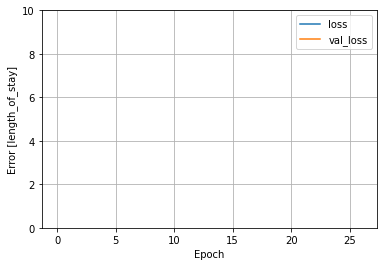

In [11]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [length_of_stay]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [12]:
predictions = model.predict(test_features).T[0]

/home/juliuswa/installed/apache-tomcat-9.0.30/anaconda3/envs/pyML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


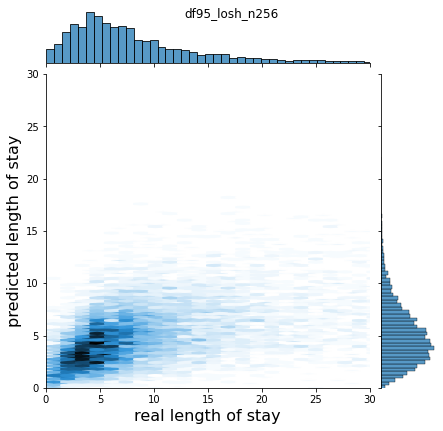

In [13]:
h = sns.jointplot(test_labels, predictions, test_labels, kind='hex', gridsize=150, xlim=(0,30), ylim=(0,30))
h.set_axis_labels('real length of stay', 'predicted length of stay', fontsize=16)
plt.suptitle(f"{model_name}")

plt.savefig(f"{model_path}/prediction_{model_name}.png")

In [14]:
errors = predictions - test_labels

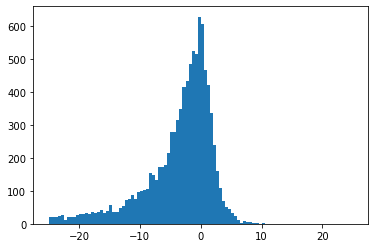

In [15]:
plt.hist(errors, bins=100, range=(-25, 25))
plt.show()

In [53]:
model.save(f"{model_path}/{model_name}")

INFO:tensorflow:Assets written to: ../../RoboDocData/95/df95_losh_n32/df95_losh_n32/assets
